## Спроба пошуку кореляції між коеф. К1-К9 та виділеним бюджетним місцям в магістратуру

Згідно наказу МОН №445  “Про затвердження Критеріїв конкурсного відбору виконавців державного замовлення на підготовку магістрів у закладах вищої освіти, які знаходяться у сфері управління МОН”  див. http://zakon3.rada.gov.ua/laws/show/z0625-18 . Запроваджується система згідно якої кожен ЗВО (заклад вищої освіти) повинен отримати ту кількість держбюджетних місць в магістратуру в 2018 році на яку він заслуговує згідно критеріїв, які підтверджують якість наукової роботи, диверсифікацію доходів, якість кадрового забезпечення тощо (див. детально наказ).

Кожен ЗВО повинен був надати необхідну інформацію для розрахунку критеріїв К1-К9 за кожного спеціальністю, надати обсяги випуску бакалаврів в 2018 році тощо.

Після перевірки значень коефіцієнтів К1-К9, утворена комісія в МОН знаходить добуток коефіцієнтів К1-К9 та потім підраховує конкурсний бал, як добуток обсягу випуску бакалавра на добуток коефіцієнтів К1-К9 (див. детально наказ п.6).

Конкурсний бал (розраховується для кожної окремої спеціальності ) = К1*К2*К3*К4*К5*К6*К7*К8*К9*”обсяг випуску бакалаврів за спеціальністю”

І згідно пукту 6 зазначеного наказу : “визначення обсягу державного замовлення проводить Комісія окремо за кожною конкурсною позицією пропорційно конкурсному балу”. В результаті ЗВО, який мав гарні показники К1-К9 повинен був розраховувати на максимальні обсяги держбюджетних місць під всіх або практично під всіх випускників бакалавратури.

Ідея наказу взагалі гарна. Оцінити університети і окремі спеціальності в цих університетах за критеріями і пропорційно ним і обсягу випуску бакалаврів розподіляти держбюджетні місця і надавати держбюджетні місця тільки тим університетам, які на це заслуговують і можуть дійсно забезпечити якісну освіту.

Давайте спробуємо перевірити цей добрий намір. Забігаючи наперед, я побачив, що обсяг  виділених держбюджетних місць в магістратуру в 2018 році дуже слабо або взагалі не корелює з коефіцієнтами К1-К9 та їх добутком і як в минулі роки розподіл держбюджетних місць скоріш за все відбувався в “ручному режимі”   (дивлячись тільки на обсяги випуску бакалаврів), а можливо я щось не врахував і тому прошу вивчити мої розрахунки, щоб ми всі разом зрозуміли де істина (я вже змарнував весь вихідний на це). 




Одна з проблем, яку ми повинні вирішити це те, що необхідна нам інформація знаходиться в трьох різних pdf файлах, яку ми повинні зібрати до купи.
Користуватися ми будемо трьома файлами pdf, які розміщені на сайті МОН і є офіційними (https://mon.gov.ua/storage/app/media/vishcha-osvita/vstup-2018/dergavne-zamovlenna/komisia/2-konkursna-komisiya-mon-z-vidboru-vikonavtsiv-dz-130718.rar та https://mon.gov.ua/storage/app/media/vishcha-osvita/vstup-2018/komisiya-mon-z-vidboru-vikonavtsiv-dz-200718.rar )

1. Перший файл: Критерії К-5_К-9.pdf - тут є необхідна для нас інформація про обсяги випуску бакалаврів. В таблиці більш ніж 3000 записів (по всім ЗВО та спеціальностям в державі). Pdf сформований кривувато і тому пришлось довго чистити мусор. 
2. Другий файл: Коофіцієнти (Наказ 445).pdf - містить в собі інформацію по значенням розрахованих коефіцієнтів К1-К9. В таблиці більш ніж 3000 записів (по всім ЗВО та спеціальностям в державі). Pdf сформований краще, з ним було менше проблем. 
3. Третій файл: Обсяг Магістратура.pdf - містить в собі саме головне: обсяги виділених держбюджетних місць в магістратуру. В таблиці більш ніж 3000 записів (по всім ЗВО та спеціальностям в державі). Pdf сформований краще, з ним було менше проблем. 

Перша задача, розпарсити ці три файли та звести докупи. Потім нагенерити додаткових фітч та подивитися на це все очами Data Scientist’a ;)


In [1]:
# Зробимо імпорт необхідних модулів
from tabula import read_pdf
import tabula
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_rows", 5000)

In [3]:
#Зчитаємо спочатку файл Обсяг Магістратура.pdf та зробимо парсінг за допомогою бібліотекі tabula
df_budj=read_pdf('Обсяг Магістратура.pdf', pages='all', lattice=True)

In [4]:
#Видалемо перший непотрібний рядок
df_budj.drop(0, axis=0,inplace=True)

In [5]:
#Дамо назви стовпчикам 
df_budj.columns=['код ЗВО', 'Назва ЗВО','Код спец.','Код. спеціал', 'Назва спец.',
               'Обсяг державного замовлення, денна', 'Обсяг державного замовлення, заочна']

In [6]:
#Приберемо сміття в стовпчику 'Код спец.'
df_budj['Код спец.'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [7]:
# Перетворимо текстові значення в числа в зазначених стовчиках
df_budj['код ЗВО']=df_budj['код ЗВО'].map(lambda x: int(x))
df_budj['Код спец.']=df_budj['Код спец.'].map(lambda x: int(x))
df_budj['Обсяг державного замовлення, денна']=df_budj['Обсяг державного замовлення, денна'].map(lambda x: int(x))
df_budj['Обсяг державного замовлення, заочна']=df_budj['Обсяг державного замовлення, заочна'].map(lambda x: int(x))

In [8]:
#В випадку коли не вказаний код спеціалізації замінемо її на 11111
df_budj['Код. спеціал'].fillna(11111, inplace=True)

In [9]:
# Перетворимо текстові значення в числа
df_budj['Код. спеціал']=df_budj['Код. спеціал'].map(lambda x: int(x))

In [10]:
#Подивимося на розмір нашої таблиці
df_budj.shape

(6626, 7)

In [11]:
#Подивимося (перші п'ять рядків), як виглядає файл Обсяг Магістратура.pdf
df_budj.head()

,код ЗВО,Назва ЗВО,Код спец.,Код. спеціал,Назва спец.,"Обсяг державного замовлення, денна","Обсяг державного замовлення, заочна"
1,101,Черкаський нацiональний унiверситет iм. Богдан...,11,11111,"Освітні, педагогічні науки",9,4
2,101,Черкаський нацiональний унiверситет iм. Богдан...,11,11111,у т.ч. за освітньо-професійними програмами,9,4
3,101,Черкаський нацiональний унiверситет iм. Богдан...,12,11111,Дошкільна освіта,19,11
4,101,Черкаський нацiональний унiверситет iм. Богдан...,12,11111,у т.ч. за освітньо-професійними програмами,19,11
5,101,Черкаський нацiональний унiверситетК iмод. Б с...,13,11111,Початкова освіта,12,13


In [12]:
#Зчитаємо файл Коофіцієнти (Наказ 445).pdf та зробимо парсінг за допомогою бібліотекі tabula
df=read_pdf('Коофіцієнти (Наказ 445).pdf', pages='all', lattice=True)

In [13]:
#У зв'язку з тим, що в файлах МОН містяться помилки. 14 строк ми видалемо, оскільки в інших файлах їх не існує
df.drop(labels=list(range(609,623)),axis=0, inplace=True)

In [14]:
df.reset_index(inplace=True, drop=True)

In [15]:
df.drop(labels=739,inplace=True,axis=0)

In [16]:
df.reset_index(inplace=True, drop=True)

In [17]:
# Подивимося на розмір нашої таблиці файл Коофіцієнти (Наказ 445).pdf
df.shape

(3014, 15)

In [18]:
#Подивимося (перші п'ять рядків), як виглядає файл Коофіцієнти (Наказ 445).pdf
df.head()

,рік,Код ВНЗ,назва ВНЗ,Unnamed: 3,Unnamed: 4,назва спеціальності,К1,К2,К3,К4,К5,К6,К7,К8,К9
0,2018,101,Черкаський нацiональний унiверситет iм. Богдан...,11,NaN,"Освітні, педагогічні науки","1,07","1,07",1,"1,02","1,1","1,1","1,2",1,1
1,2018,101,Черкаський нацiональний унiверситет iм. Богдан...,12,NaN,Дошкільна освіта,"1,07","1,07",1,"1,02","1,1",1,"1,2","1,01",1
2,2018,101,Черкаський нацiональний унiверситет iм. Богдан...,13,NaN,Початкова освіта,"1,07","1,07",1,"1,02","1,1",1,"1,09",1,1
3,2018,101,Черкаський нацiональний унiверситет iм. Богдан...,14,1.0,Середня освіта (українська мова і література),"1,07","1,07",1,"1,02","1,1",1,"1,03",1,1
4,2018,101,Черкаський нацiональний унiверситет iм. Богдан...,14,2.0,Середня освіта (мова і література (із зазначен...,"1,07","1,07",1,"1,02","1,1",1,"1,08",1,"1,08"


In [19]:
#Зчитаємо останній файл Критерії К-5_К-9.pdf та зробимо парсінг за допомогою бібліотекі tabula
df_old=read_pdf('Критерії К-5_К-9.pdf', pages='all', lattice=True)

In [20]:
#У зв'язку з тим, що в файлах МОН містяться помилки. 14 строк ми видалемо, оскільки в інших файлах їх не існує
df_old.drop(labels=list(range(609,613)),axis=0, inplace=True)

In [21]:
df_old.reset_index(inplace=True,drop=True )

In [22]:
df_old.drop(labels=[1899],axis=0, inplace=True)

In [23]:
df_old.reset_index(inplace=True,drop=True )

In [24]:
df.drop(labels=[2027],axis=0, inplace=True)

In [25]:
df.reset_index(inplace=True,drop=True )

In [26]:
# Подивимося на розмір нашої таблиці файл Коофіцієнти (Наказ 445).pdf
df.shape

(3013, 15)

In [27]:
# Подивимося на розмір нашої таблиці файл Критерії К-5_К-9.pdf
df_old.shape

(3013, 13)

In [28]:
#Подивимося (перші п'ять рядків), як виглядає файл Критерії К-5_К-9.pdf
df_old.head()

,рік,Код ВНЗ,назва ВНЗ,Unnamed: 3,Unnamed: 4,назва спеціальності,Випуск бакалавра (денна),Випуск бакалавра (заочна),К-5,К-6,К-7,К-8,k9
0,2018,101,Черкаський нацiональний унiверситет iм. Бог,0а1н1а Х,ель,"Оицсвькітонгіо, педагогічні науки",0,0,"1,1","1,1","1,2",1,1
1,2018,101,Черкаський нацiональний унiверситет iм. Бог,0а1н2а Х,ель,Диоцшьккоілгоьна освіта,27,10,"1,1",1,"1,2","1,01",1
2,2018,101,Черкаський нацiональний унiверситет iм. Бог,0а1н3а Х,ель,Пицочьакотгкова освіта,17,14,"1,1",1,"1,11",1,1
3,2018,101,Черкаський нацiональний унiверситет iм. Бог,0а1н4а Х,0е1ль,Сицерькеодгноя освіта (українська мова і літер...,30,6,"1,1",1,"1,03",1,1
4,2018,101,Черкаський нацiональний унiверситет iм. Бог,0а1н4а Х,0е2ль,Сицерькеодгноя освіта (мова і література (із з...,52,7,"1,1",1,"1,08",1,"1,08"


#### Зробимо деякі перетворення: нові назви стовпчиків, перетворимо рядки в числа тощо

In [29]:
df_old.columns=['рік', 'код ЗВО', 'Назва ЗВО','Код спец.','Код. спеціал', 'Назва спец.',
                                'Випуск бак., денна','Випуск бак., заоч','K-5','K-6','K-7','K-8','K-9']

In [30]:
df_old['Випуск бак., денна'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [31]:
df['Випуск бак., денна']=df_old['Випуск бак., денна']

In [32]:
df.columns=['рік', 'код ЗВО', 'Назва ЗВО','Код спец.','Код. спеціал', 'Назва спец.',
                                'K1','K2','K3','K4','K5','K6','K7','K8','K9', 'Випуск бак., денна']

In [33]:
df['код ЗВО']=df['код ЗВО'].map(lambda x: int(x))

In [34]:
df['Код спец.']=df['Код спец.'].map(lambda x: int(x))

In [35]:
df['Випуск бак., денна']=df['Випуск бак., денна'].map(lambda x: int(x))

In [36]:
df['Код. спеціал'].fillna(11111, inplace=True)

In [37]:
df['Код. спеціал']=df['Код. спеціал'].map(lambda x: int(x))

In [38]:
# Перетворимо рядки коеф. К1-К9 в числа з плаваючою комою
df['K1']=[float(x.replace(',','.')) for x in df['K1']]
df['K2']=[float(x.replace(',','.')) for x in df['K2']]
df['K3']=[float(x.replace(',','.')) for x in df['K3']]
df['K4']=[float(x.replace(',','.')) for x in df['K4']]
df['K5']=[float(x.replace(',','.')) for x in df['K5']]
df['K6']=[float(x.replace(',','.')) for x in df['K6']]
df['K7']=[float(x.replace(',','.')) for x in df['K7']]
df['K8']=[float(x.replace(',','.')) for x in df['K8']]
df['K9']=[float(x.replace(',','.')) for x in df['K9']]

In [39]:
# Згідно Наказу МОН, якщо випуск бакалаврів менше 5, то встановлювати значення випуску = 5
# Для цього створемо новий рядок та дамо назву "Випуск бак. min 5, денна"
df['Випуск бак. min 5, денна']=df['Випуск бак., денна'].map(lambda x: 5 if x<5 else x)

In [40]:
df.head()

,рік,код ЗВО,Назва ЗВО,Код спец.,Код. спеціал,Назва спец.,K1,K2,K3,K4,K5,K6,K7,K8,K9,"Випуск бак., денна","Випуск бак. min 5, денна"
0,2018,101,Черкаський нацiональний унiверситет iм. Богдан...,11,11111,"Освітні, педагогічні науки",1.07,1.07,1.0,1.02,1.1,1.1,1.20,1.00,1.00,0,5
1,2018,101,Черкаський нацiональний унiверситет iм. Богдан...,12,11111,Дошкільна освіта,1.07,1.07,1.0,1.02,1.1,1.0,1.20,1.01,1.00,27,27
2,2018,101,Черкаський нацiональний унiверситет iм. Богдан...,13,11111,Початкова освіта,1.07,1.07,1.0,1.02,1.1,1.0,1.09,1.00,1.00,17,17
3,2018,101,Черкаський нацiональний унiверситет iм. Богдан...,14,1,Середня освіта (українська мова і література),1.07,1.07,1.0,1.02,1.1,1.0,1.03,1.00,1.00,30,30
4,2018,101,Черкаський нацiональний унiверситет iм. Богдан...,14,2,Середня освіта (мова і література (із зазначен...,1.07,1.07,1.0,1.02,1.1,1.0,1.08,1.00,1.08,52,52


### Почнемо переміщення даних з однієї табліці до іншої

In [41]:
arr_opp=[]
arr_onp=[]

for index,row in df.iterrows():
    
    arr_opp.append(df_budj['Обсяг державного замовлення, денна'].loc[(df_budj['код ЗВО']==row['код ЗВО']) & (df_budj['Код спец.']==row['Код спец.']) & (df_budj['Код. спеціал']==row['Код. спеціал']) & (df_budj['Назва спец.']=='у т.ч. за освітньо-професійними програмами')])
    arr_onp.append(df_budj['Обсяг державного замовлення, денна'].loc[(df_budj['код ЗВО']==row['код ЗВО']) & (df_budj['Код спец.']==row['Код спец.']) & (df_budj['Код. спеціал']==row['Код. спеціал']) & (df_budj['Назва спец.']=='у т.ч. за освітньо-науковими програмами') ])
    

In [42]:
opp=[]
onp=[]
for i,_ in enumerate(arr_opp):
    if len(arr_opp[i].values)==0:
        opp.append(0)
    else:
        opp.append(arr_opp[i].values[0])
    if len(arr_onp[i].values)==0:
        onp.append(0)
    else:
        onp.append(arr_onp[i].values[0])
        

In [43]:
# Створимо нові окремі стовчики: 'Обсяг державного замовлення ОПП, денна'
# та 'Обсяг державного замовлення ОНП, денна'
df['Обсяг державного замовлення ОПП, денна']=opp
df['Обсяг державного замовлення ОНП, денна']=onp

In [44]:
# Створимо новий стовчик: 'Обсяг державного замовлення Всього, денна'
df['Обсяг державного замовлення Всього, денна']=np.array(opp)+np.array(onp)

In [45]:
# Створимо новий стовчик: 'Mult K1-K9' якій дорівнює добутку коеф. К1-К9
df.insert(loc=15, column='Mult K1-K9', value=(df['K1']*df['K2']*df['K3']*df['K4']*df['K5']*
                                            df['K6']*df['K7']*df['K8']*df['K9']))

In [46]:
# Створимо новий стовчик: 'Конкурсний бал' якій дорівнює добутку коеф. К1-К9 та Випуск бак.
df.insert(loc=18, column='Конкурсний бал', value=(df['Mult K1-K9']*df['Випуск бак. min 5, денна']))

### Створимо новий дуже цікавий стовчик:'% наданого державного замовлення від випуску бак., денна' Подивимося на скільки % МОН задовольнив пропозиції випуску ЗВО 

In [47]:
# Створимо новий дуже цікавий стовчик:'% наданого державного замовлення від випуску бак., денна'
df['% наданого державного замовлення від випуску бак., денна']=((df['Обсяг державного замовлення Всього, денна']/
                                                                df['Випуск бак. min 5, денна'])*100)

In [48]:
df.head()

,рік,код ЗВО,Назва ЗВО,Код спец.,Код. спеціал,Назва спец.,K1,K2,K3,K4,...,K8,K9,Mult K1-K9,"Випуск бак., денна","Випуск бак. min 5, денна",Конкурсний бал,"Обсяг державного замовлення ОПП, денна","Обсяг державного замовлення ОНП, денна","Обсяг державного замовлення Всього, денна","% наданого державного замовлення від випуску бак., денна"
0,2018,101,Черкаський нацiональний унiверситет iм. Богдан...,11,11111,"Освітні, педагогічні науки",1.07,1.07,1.0,1.02,...,1.00,1.00,1.695643,0,5,8.478213,9,0,9,180.000000
1,2018,101,Черкаський нацiональний унiверситет iм. Богдан...,12,11111,Дошкільна освіта,1.07,1.07,1.0,1.02,...,1.01,1.00,1.556908,27,27,42.036524,19,0,19,70.370370
2,2018,101,Черкаський нацiональний унiверситет iм. Богдан...,13,11111,Початкова освіта,1.07,1.07,1.0,1.02,...,1.00,1.00,1.400190,17,17,23.803227,12,0,12,70.588235
3,2018,101,Черкаський нацiональний унiверситет iм. Богдан...,14,1,Середня освіта (українська мова і література),1.07,1.07,1.0,1.02,...,1.00,1.00,1.323115,30,30,39.693454,19,0,19,63.333333
4,2018,101,Черкаський нацiональний унiверситет iм. Богдан...,14,2,Середня освіта (мова і література (із зазначен...,1.07,1.07,1.0,1.02,...,1.00,1.08,1.498332,52,52,77.913240,25,0,25,48.076923


### Давайте подивимося, що вийшло. Зробимо сортування (від більшого до меншого) нашої великої таблиці по значенню добутку коефіцієнтів К1-К9 (стовпчик Mult K1-K9). Якщо переглядати таблицю в першу чергу останній стовпчик (% наданого державного замовлення від випуску бак., денна) то вже видно, що величини коефіцієнтів К1-К9 слабо корелюють з наданим бюджетом. Фактично таблиця, що вийшла, це такий собі рейтинг спеціальностей за показниками К1-К9, він доволі цікавий, в ТОПі цікаві університети та спеціальності.

In [49]:
df.sort_values('Mult K1-K9', axis=0, ascending=False, inplace=False)[:5]

,рік,код ЗВО,Назва ЗВО,Код спец.,Код. спеціал,Назва спец.,K1,K2,K3,K4,...,K8,K9,Mult K1-K9,"Випуск бак., денна","Випуск бак. min 5, денна",Конкурсний бал,"Обсяг державного замовлення ОПП, денна","Обсяг державного замовлення ОНП, денна","Обсяг державного замовлення Всього, денна","% наданого державного замовлення від випуску бак., денна"
1630,2018,307,Київський нацiональний унiверситет технологiй ...,22,11111,Дизайн,1.11,1.07,1.0,1.00,...,1.03,1.63,2.871203,79,79,226.825046,60,0,60,75.949367
134,2018,109,Житомирський державний унiверситет ім. Івана Ф...,14,6,Середня освіта (хімія),1.06,1.07,1.0,1.04,...,1.00,2.00,2.830963,10,10,28.309632,10,0,10,100.000000
2322,2018,61,Чернівецький нацiональний унiверситет iм. Юрія...,14,13,Середня освіта (музичне мистецтво),1.13,1.07,1.0,1.02,...,1.00,2.00,2.713220,8,8,21.705763,2,0,2,25.000000
2958,2018,97,"Національний унiверситет ""Львiвська полiтехнiка""",22,11111,Дизайн,1.17,1.07,1.0,1.02,...,1.00,1.41,2.412287,31,31,74.780883,10,10,20,64.516129
2319,2018,61,Чернівецький нацiональний унiверситет iм. Юрія...,14,8,Середня освіта (фізика),1.13,1.07,1.0,1.02,...,1.00,1.75,2.374068,13,13,30.862882,15,0,15,115.384615


### А тепер зробимо сортування (від більшого до меншого) нашої великої таблиці по 'Коду спеціальності' а потім в рамках однієї спеціальності по значенню добутку коефіцієнтів К1-К9 (стовпчик Mult K1-K9). Тепер ми можемо бачити, як розподіляється бюджет серед університетів по окремо взятим спеціальностям. Якщо переглядати таблицю в першу чергу останній стовпчик (% наданого державного замовлення від випуску бак., денна) то вже видно, що величини коефіцієнтів К1-К9 слабо корелюють з наданим бюджетом.


In [50]:
df.sort_values(['Код спец.','Mult K1-K9'], axis=0, ascending=False, inplace=False)[:5]

,рік,код ЗВО,Назва ЗВО,Код спец.,Код. спеціал,Назва спец.,K1,K2,K3,K4,...,K8,K9,Mult K1-K9,"Випуск бак., денна","Випуск бак. min 5, денна",Конкурсний бал,"Обсяг державного замовлення ОПП, денна","Обсяг державного замовлення ОНП, денна","Обсяг державного замовлення Всього, денна","% наданого державного замовлення від випуску бак., денна"
1307,2018,246,Донецький нацiональний унiверситет ім. Василя ...,292,11111,Міжнародні економічні відносини,1.07,1.07,1.1,1.10,...,1.10,1.0,2.212647,3,5,11.063237,6,0,6,120.000000
2060,2018,41,Київський національний університет ім. Тараса ...,292,11111,Міжнародні економічні відносини,1.19,1.03,1.1,1.00,...,1.06,1.0,2.075149,56,56,116.208362,36,0,36,64.285714
2418,2018,62,Харківський національний унiверситет iм. В.Н.К...,292,11111,Міжнародні економічні відносини,1.27,1.07,1.1,1.02,...,1.05,1.0,1.960006,16,16,31.360103,16,0,16,100.000000
634,2018,168,Сумський державний унiверситет,292,11111,Міжнародні економічні відносини,1.25,1.07,1.1,1.04,...,1.04,1.0,1.872965,11,11,20.602613,11,0,11,100.000000
1569,2018,282,Львівський нацiональний унiверситет імені Іван...,292,11111,Міжнародні економічні відносини,1.15,1.07,1.1,1.02,...,1.03,1.0,1.855975,23,23,42.687426,21,0,21,91.304348


In [51]:
#Давайте збережемо цб таблицю в форматі Exсel для 'ліриків'
file=df.sort_values(['Код спец.','Mult K1-K9'], axis=0, ascending=False, inplace=False)
file.to_excel('Mag2018_K1_k9_v2.xlsx')

### Давайте спробуємо розібратися в природі наших показників. Спочатку віалізуємо гістограму Добуток коеф. К1-К9 по всім значенням в таблиці. Гарний знак, що ми бачимо розподіл Гауса (або нормальний розподіл) з  правим хвостом. 

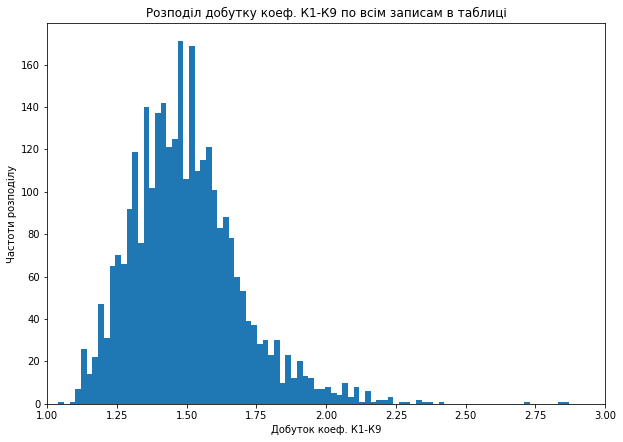

In [52]:
plt.figure(figsize=(10,7))
plt.title('Розподіл добутку коеф. К1-К9 по всім записам в таблиці')
plt.xlabel('Добуток коеф. К1-К9')
plt.ylabel('Частоти розподілу')
plt.xlim(1,3)
plt.hist(df['Mult K1-K9'], bins=90)
#plt.savefig("hist.png")
plt.show()

### Подивимося на кількісний розподіл випуску бакалаврів. Особливих претензій немає. Природа розподілу зрозуміла. 

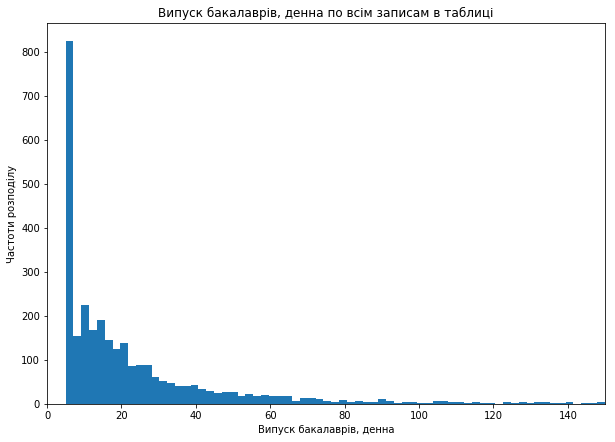

In [53]:
plt.figure(figsize=(10,7))
plt.title('Випуск бакалаврів, денна по всім записам в таблиці')
plt.xlabel('Випуск бакалаврів, денна')
plt.ylabel('Частоти розподілу')
plt.xlim(0,150)
plt.hist(df['Випуск бак. min 5, денна'], bins=200)
#plt.savefig("hist.png")
plt.show()

### Подивимося на 'Конкурсний бал', згідно наказа це добуток всіх коефіцієнтів на обсяг випуску бакалаврів. Особливих претензій немає. Природа розподілу зрозуміла. 

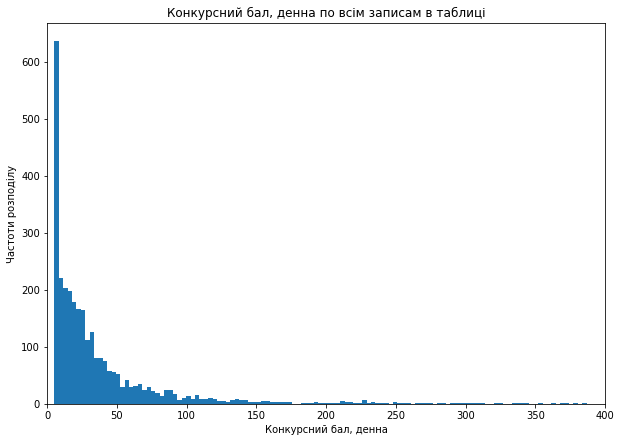

In [54]:
plt.figure(figsize=(10,7))
plt.title('Конкурсний бал, денна по всім записам в таблиці')
plt.xlabel('Конкурсний бал, денна')
plt.ylabel('Частоти розподілу')
plt.xlim(0,400)
plt.hist(df['Конкурсний бал'], bins=200)
#plt.savefig("hist.png")
plt.show()

### Подивимося на розподіл надоного державного замовлення на ОС магістр, згідно наказа кількість місць повинна бути пропорційна 'Конкурсному балу' (див попередній рисунок). Що ми бачимо? Розподіл став гірше, бачимо незрозумілі максимуми.

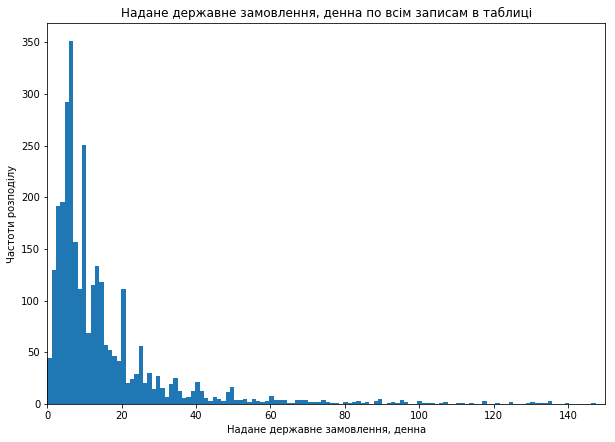

In [55]:
plt.figure(figsize=(10,7))
plt.title('Надане державне замовлення, денна по всім записам в таблиці')
plt.xlabel('Надане державне замовлення, денна')
plt.ylabel('Частоти розподілу')
plt.xlim(0,150)
plt.hist(df['Обсяг державного замовлення Всього, денна'], bins=200)
#plt.savefig("hist.png")
plt.show()

### Подивимося на дуже цікавий показник - "відсоток наданого державного замовлення за ОС магістр від випуску бакалавра". Що ми бачимо? Бачимо взагалі незрозумілі максимуми в 50%, 60%, 100%.(деталі нижче). Іншими словами комісія МОН, наприклад більше ніж в 200 випадках встановила значення держбюджету рівне 60% від випуску бакалавра, більше 150 разів встановила значення держбюджету рівне 50% та 100% від випуску бакалавра. Взагалі ця гістограма красномовно свідчить, що дуже часто коефіцієнти нихто не враховував, а користувалися цілими числами. (деталі нижче)

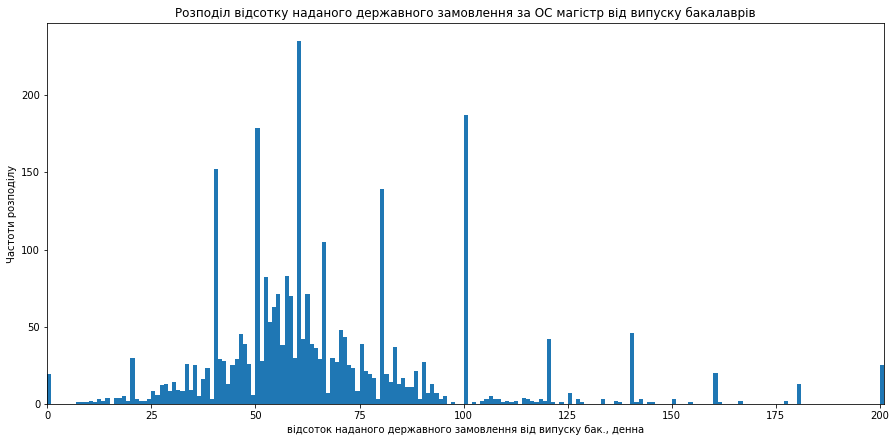

In [56]:
plt.figure(figsize=(15,7))
plt.title('Розподіл відсотку наданого державного замовлення за ОС магістр від випуску бакалаврів')
plt.xlabel('відсоток наданого державного замовлення від випуску бак., денна')
plt.ylabel('Частоти розподілу')
plt.xlim(0,201)
plt.hist(df['% наданого державного замовлення від випуску бак., денна'], bins=1000)
plt.savefig("hist.png")
plt.show()

### А давайте порахуємо скільки разів в усій таблиці (3014 записів) зустрічається різні значення показника: "відсоток наданого державного замовлення від випуску бак., денна'". Що ми бачимо? Комісія МОН: 212 раза встановлювало обсяг магістрів на рівні 60%  випуску бакалавра; 187 разів встановлювало обсяг магістрів на рівні 100%  випуску бакалавра, 173 разів встановлювало обсяг магістрів на рівні 50%  випуску бакалавра і т.і. Також популярні цифри: 40%, 80%, 66.667%, 140%, 200% тощо. Зверніть увагу, що переважна кількість цифр цілі! Іншими словами, якщо комісія МОН все ж таки користувалася добутком коефіцієнтів К1-К9 то яким чином вийшли такі красиві цілі числа?

In [57]:
df['% наданого державного замовлення від випуску бак., денна'].value_counts()[:160]

60.000000     212
100.000000    187
50.000000     173
40.000000     148
80.000000     132
66.666667      97
62.500000      53
57.142857      50
55.555556      48
140.000000     46
120.000000     42
71.428571      39
83.333333      36
75.000000      34
20.000000      29
54.545455      28
58.333333      27
53.333333      26
200.000000     25
52.631579      24
70.000000      24
58.823529      23
33.333333      23
42.857143      20
160.000000     20
Name: % наданого державного замовлення від випуску бак., денна, dtype: int64

In [58]:
#spec=df[(df['Код спец.']==172)]
#spec.sort_values('Mult K1-K9', axis=0, ascending=False, inplace=False)

### Може це все наші видумки. Давайте подивимося на залежність кількості виділених держбюджетних місць від значення добутку коефіцієнтів К1-К9. Очикуємо бачити на якусь залежність, зі збільшенням значення добутку К1-К9 повинні зростати обсяги держзамовлення. Що ми бачимо? Ми бачимо нормальний розподіл, як ми знаємо зі статистики, нормальним розподілом можна описувати случайні величини. Іншими словами немає взаємозв'язку між добутком К1-К9 та виділеним держбюджетом на магістра.


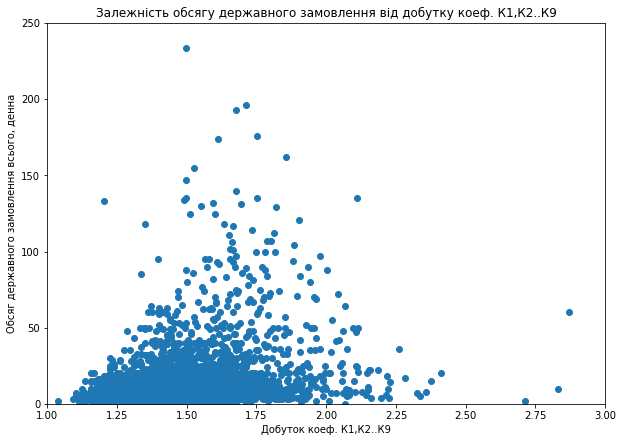

In [59]:
plt.figure(figsize=(10,7))
plt.title('Залежність обсягу державного замовлення від добутку коеф. К1,К2..К9')
plt.xlabel('Добуток коеф. К1,К2..К9')
plt.ylabel('Обсяг державного замовлення всього, денна')
plt.xlim(1,3)
plt.ylim(0,250)
plt.scatter(df['Mult K1-K9'], df['Обсяг державного замовлення Всього, денна'])
plt.show()

### Ви будете заперечувати і скажете, що добуток К1-К9 не повинен напряму залежати від держбюджетних місць. Ок, згоден. Тоді давайте подивимося на наступне: на залежність 'відсоток наданого державного замовлення за ОС магістр від випуску бак., денна' від добутку коефіцієнтів К1-К9. Із логіки - з ростом значення добутку коефіцієнтів К1-К9 (університет якісний, спеціальність супер) повинен і зростати 'відсоток наданого державного замовлення за ОС магістр від випуску бак., денна' . Що ми бачимо? Ніякої залежності, можна отримати 100% від випуску бакалавра при значенні добутку К1-К9 рівними 1,1 та при 2,0 і вище. Крім того зверніть увагу на горизонтальні лінії з точок, як ми показували вище комісія МОН брала круглі цифри і це точно немає ніякого стосунку до коефіцієнтів.

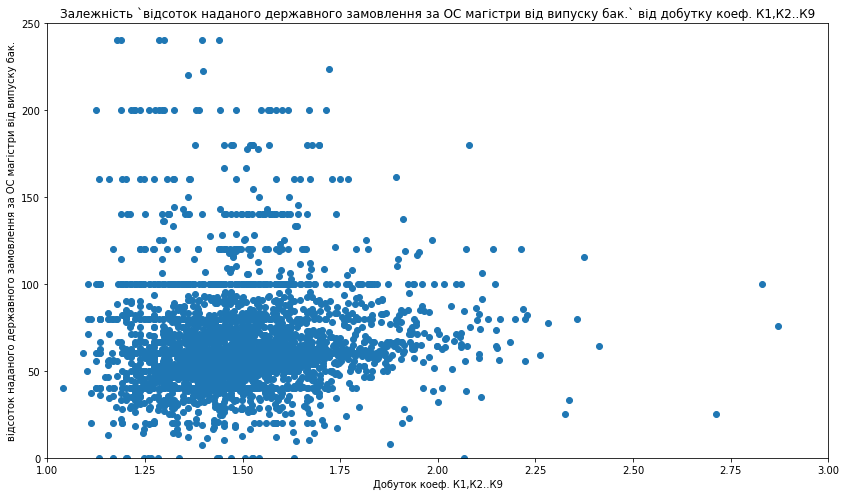

In [60]:
plt.figure(figsize=(14,8))
plt.title('Залежність `відсоток наданого державного замовлення за ОС магістри від випуску бак.` від добутку коеф. К1,К2..К9')
plt.xlabel('Добуток коеф. К1,К2..К9')
plt.ylabel('відсоток наданого державного замовлення за ОС магістри від випуску бак.')
plt.xlim(1,3)
plt.ylim(0,250)
plt.scatter(df['Mult K1-K9'], df['% наданого державного замовлення від випуску бак., денна'])
plt.show()
plt.savefig("scater.png")

### Ок, давайте порахуємо кореляцію усьго чого можна, можливо ми щось знайдемо?
##### https://uk.wikipedia.org/wiki/%D0%9A%D0%BE%D0%B5%D1%84%D1%96%D1%86%D1%96%D1%94%D0%BD%D1%82_%D0%BA%D0%BE%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D1%96%D1%97_%D0%9F%D1%96%D1%80%D1%81%D0%BE%D0%BD%D0%B0

#### Що ми бачимо з таблиці? Незначну кореляцію добутку коефіцієнтів К1-К9 з обсягом державного замовлення за ОС магістр. Вплив окремих коефіцієнтів взагалі мізерний, що свідчить скоріш за все про не досконалу методику. Смішним є те, що обсяг державного замовлення за ОС магістр краще корелює з кодом спеціальності (це цікава річ) ніж з окремими коефіцієнтами. Єдине, що необхідно відмітити дуже гарну кореляцію - 0.92 обсягу державного замовлення за ОС магістр з обсягом випуску бакалаврів, но якщо б і цього не було тоді я не знаю)))

In [61]:
temp_corr=df.copy()

In [62]:
temp_corr.drop(['рік'], axis=1, inplace=True)

In [63]:
temp_corr.corr()

,код ЗВО,Код спец.,Код. спеціал,K1,K2,K3,K4,K5,K6,K7,K8,K9,Mult K1-K9,"Випуск бак., денна","Випуск бак. min 5, денна",Конкурсний бал,"Обсяг державного замовлення ОПП, денна","Обсяг державного замовлення ОНП, денна","Обсяг державного замовлення Всього, денна","% наданого державного замовлення від випуску бак., денна"
код ЗВО,1.000000,-0.028863,-0.063385,-0.124440,0.010936,-0.042647,-0.023888,0.032761,-0.027377,-0.038916,-0.003939,0.047094,-0.070842,0.013705,0.013776,0.003566,0.019841,-0.024034,0.009946,-0.014792
Код спец.,-0.028863,1.000000,0.456352,0.115105,0.118756,-0.025202,-0.036253,-0.022651,-0.006120,-0.063801,0.091414,-0.172300,-0.042067,0.119513,0.121839,0.115805,0.132933,0.042572,0.135506,0.068196
Код. спеціал,-0.063385,0.456352,1.000000,0.112370,0.106322,-0.023912,-0.018673,-0.026074,0.123820,0.059784,0.048006,-0.134059,0.068205,0.067684,0.070448,0.077667,0.070820,0.044913,0.079712,0.015335
K1,-0.124440,0.115105,0.112370,1.000000,0.188756,0.580075,-0.192765,0.002986,0.115138,-0.178814,0.051759,-0.044295,0.471948,0.112181,0.108186,0.156202,0.109631,0.182817,0.161719,0.070244
K2,0.010936,0.118756,0.106322,0.188756,1.000000,0.030439,0.009005,-0.037183,0.049625,-0.053381,0.052272,-0.008264,0.194540,0.030452,0.030319,0.043876,0.101618,-0.108934,0.055727,0.068327
K3,-0.042647,-0.025202,-0.023912,0.580075,0.030439,1.000000,-0.075037,0.009487,0.119071,-0.060404,0.034448,-0.038672,0.467496,0.111274,0.111225,0.160655,0.086531,0.249731,0.163310,0.083110
K4,-0.023888,-0.036253,-0.018673,-0.192765,0.009005,-0.075037,1.000000,0.022585,-0.130008,0.149712,-0.052210,-0.032250,0.117252,-0.193000,-0.188342,-0.178542,-0.152032,-0.139487,-0.185690,-0.023999
K5,0.032761,-0.022651,-0.026074,0.002986,-0.037183,0.009487,0.022585,1.000000,0.131915,0.033855,0.098943,-0.013155,0.254383,0.136675,0.125310,0.130799,0.114719,0.036293,0.116790,-0.138613
K6,-0.027377,-0.006120,0.123820,0.115138,0.049625,0.119071,-0.130008,0.131915,1.000000,0.012192,0.088892,-0.048474,0.354124,0.383218,0.381714,0.404766,0.351818,0.200996,0.388509,-0.021196
K7,-0.038916,-0.063801,0.059784,-0.178814,-0.053381,-0.060404,0.149712,0.033855,0.012192,1.000000,0.114158,0.016855,0.515863,-0.013741,-0.009325,0.028663,0.000508,0.006598,0.002694,0.026412


### Ще порція статистичної інформації. Зверніть увагу на значення коефіцієнтів, наприклад К3, К5 взагалі слабо змінюються. Зверніть увагу на статистику по випуску в по місцям

In [64]:
columns=['K1', 'K2', 'K3', 'K4', 'K5', 'K6', 'K7', 'K8', 'K9',
       'Mult K1-K9', 'Випуск бак., денна', 'Випуск бак. min 5, денна',
       'Конкурсний бал', 'Обсяг державного замовлення ОПП, денна',
       'Обсяг державного замовлення ОНП, денна',
       'Обсяг державного замовлення Всього, денна',
       '% наданого державного замовлення від випуску бак., денна']

In [65]:
df[columns].describe()

,K1,K2,K3,K4,K5,K6,K7,K8,K9,Mult K1-K9,"Випуск бак., денна","Випуск бак. min 5, денна",Конкурсний бал,"Обсяг державного замовлення ОПП, денна","Обсяг державного замовлення ОНП, денна","Обсяг державного замовлення Всього, денна","% наданого державного замовлення від випуску бак., денна"
count,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000,3013.000000
mean,1.072834,1.059681,1.010056,1.028503,1.091968,1.030651,1.101859,1.013442,1.008964,1.498701,25.032858,25.794557,39.880226,14.097577,1.349817,15.447395,69.304090
std,0.059692,0.017642,0.030080,0.025836,0.027183,0.035808,0.079360,0.026823,0.056689,0.197151,34.985017,34.486673,56.201489,17.914057,6.651675,19.663545,43.667065
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.040300,0.000000,5.000000,5.201500,0.000000,0.000000,0.000000,0.000000
25%,1.030000,1.040000,1.000000,1.020000,1.100000,1.000000,1.020000,1.000000,1.000000,1.362067,6.000000,6.000000,9.664347,5.000000,0.000000,5.000000,50.000000
50%,1.060000,1.070000,1.000000,1.020000,1.100000,1.000000,1.100000,1.000000,1.000000,1.480158,15.000000,15.000000,21.906013,9.000000,0.000000,10.000000,60.000000
75%,1.100000,1.070000,1.000000,1.040000,1.100000,1.050000,1.200000,1.010000,1.000000,1.601021,29.000000,29.000000,43.820354,16.000000,0.000000,17.000000,80.000000
max,1.270000,1.070000,1.100000,1.100000,1.100000,1.100000,1.200000,1.100000,2.000000,2.871203,425.000000,425.000000,635.755962,234.000000,147.000000,234.000000,1000.000000


### І на останок порція графіків залежності параметрів: 'Mult K1-K9', 'Випуск бак. min 5, денна', 'Обсяг державного замовлення Всього, денна', '% наданого державного замовлення від випуску бак., денна'. Що можна сказати, при розподілі держбюджетних місць за ОС магістр комісія МОН опиралася тільки на один показник - 'Випуск бакалаврів'

In [66]:
columns=['Mult K1-K9', 'Випуск бак. min 5, денна',
        'Обсяг державного замовлення Всього, денна',
       '% наданого державного замовлення від випуску бак., денна']

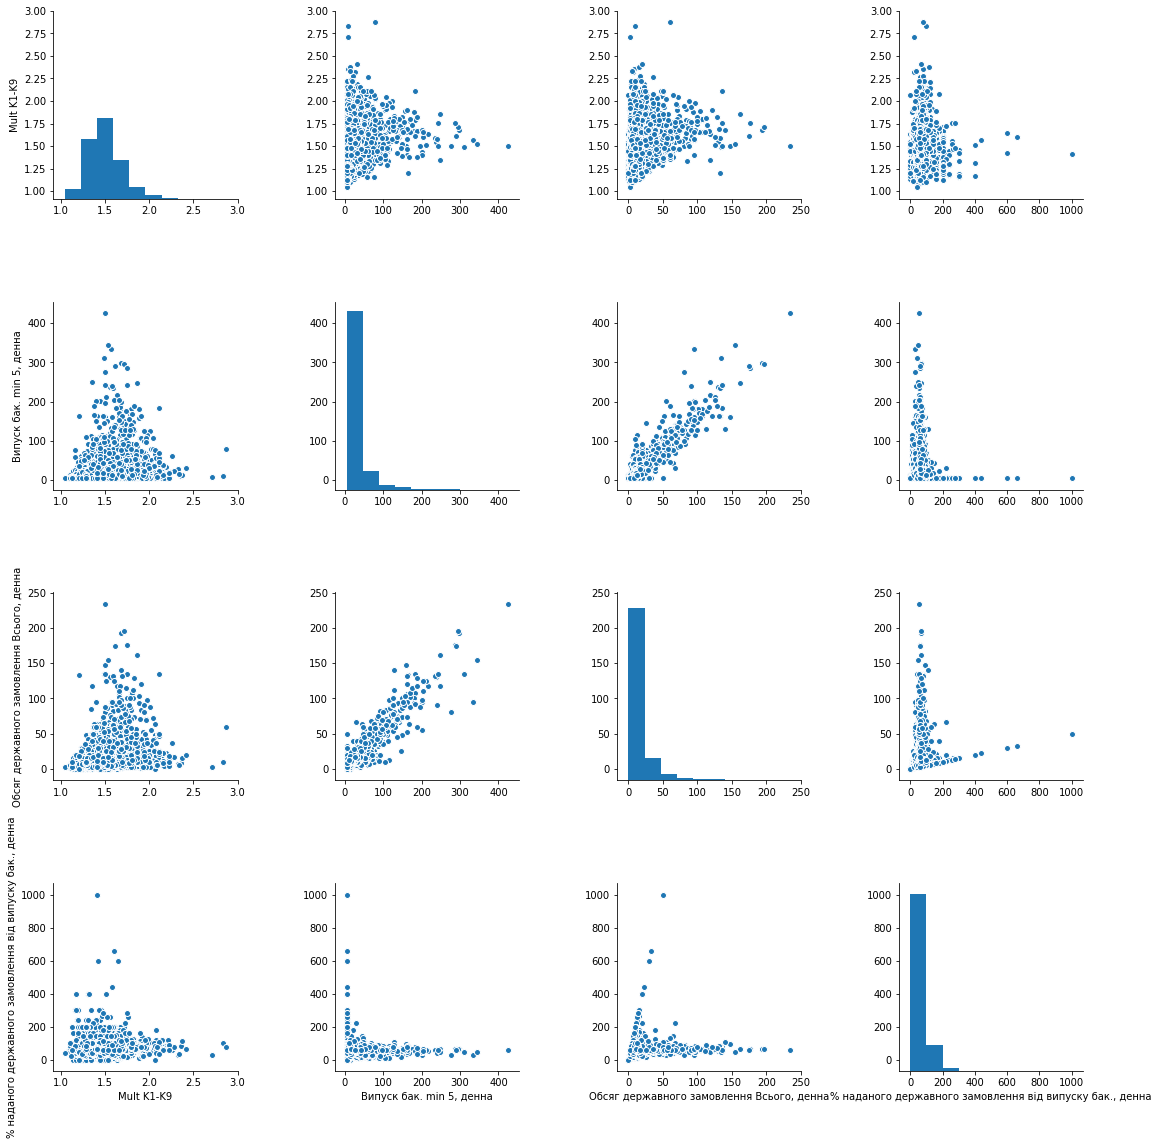

In [67]:
sns.pairplot(df[columns], size=4.0)
plt.show()